In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:

baseurl = "https://www.remax.com.tr"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36"}

houselinks = []


for x in range(1, 84):
    # Send a GET request to fetch the page content
    page = requests.get(f"https://www.remax.com.tr/konut/satilik/daire/istanbul-anadolu/?page={x}", headers=headers)  
    soup = BeautifulSoup(page.content, "lxml")  # Parse the page content
    
    houses = soup.find_all("div", class_="result-list")  # Find all house listing sections

    for item in houses:
        for link in item.find_all("a", href=True):  # Extract all links within listings
            full_link = baseurl + link["href"]  # Construct the full URL of the listing
            
            # If the link contains "portfoy" and is not already in the list, add it
            if full_link not in houselinks and "portfoy" in full_link:  
                houselinks.append(full_link)

houselist = []
for link in houselinks:
    page = requests.get(link, headers=headers)
    soup = BeautifulSoup(page.content, "lxml")

    
    # Extract the advertisement title
    advertisement = soup.find("h1", id="propertyTitle")  
    advertisement = advertisement.text.strip() if advertisement else "N/A"

    # Extract the advertisement number
    advertisement_no = soup.find("small", class_="propertyNo-mobile")  
    advertisement_no = advertisement_no.text.strip() if advertisement_no else "N/A"

    # Store the current date as the advertisement extraction date
    advertisement_date = datetime.now().strftime("%m-%d-%Y")  

    # Extract the location details (breadcrumb navigation)
    location = soup.find("div", class_="breadcrumbs")  
    location = location.text.strip() if location else "N/A"

    # Extract the property price
    price = soup.find("strong", class_="price-share")  
    price = price.text.strip() if price else "N/A"

    # Extract gross area (m²)
    gross_area = soup.find("strong", text="m2 (Brüt)")  
    gross_area = gross_area.find_next("span").text.strip() if gross_area else "N/A"

    # Extract net area (m²)
    net_area = soup.find("strong", text="m2 (Net)")  
    net_area = net_area.find_next("span").text.strip() if net_area else "N/A"

    # Extract the age of the building
    age = soup.find("strong", text="Bina Yaşı")  
    age = age.find_next("span").text.strip() if age else "N/A"

    # Extract the number of rooms
    room = soup.find("strong", text="Oda Sayısı")  
    room = room.find_next("span").text.strip() if room else "N/A"

    # Extract the floor number
    floor = soup.find("strong", text="Bulunduğu Kat")  
    floor = floor.find_next("span").text.strip() if floor else "N/A"

    # Extract the heating type
    heating = soup.find("strong", text="Isıtma")  
    heating = heating.find_next("span").text.strip() if heating else "N/A"

    # Extract whether the property is furnished
    furnished = soup.find("strong", text="Eşyalı")  
    furnished = furnished.find_next("span").text.strip() if furnished else "N/A"

    
    house = {
        "Advertisement": advertisement,
        "Advertisement No": advertisement_no,
        "Advertisement Date": advertisement_date,
        "Location": location,
        "Price": price,
        "Gross Area": gross_area,
        "Net Area": net_area,
        "Age": age,
        "Room": room,
        "Floor": floor,
        "Heating": heating,
        "Furnished": furnished
    }

    houselist.append(house)

print(len(houselist))

In [4]:
df = pd.DataFrame(houselist)  # Convert the list of house dictionaries into a DataFrame
df["House URL"] = houselinks  # Add the corresponding URLs to the DataFrame

df

NameError: name 'houselist' is not defined

In [ ]:
df.to_csv("C:/Users/Furkan/data_analysis/web_scraping/istanbul_anatolia_house_price.csv", index=False, encoding="utf-8-sig")

In [3]:
df = pd.read_csv("istanbul_anatolia_house_price.csv")
df

,Advertisement,Advertisement No,Advertisement Date,Location,Price,Gross Area,Net Area,Age,Room,Floor,Heating,Furnished,House URL
0,"MODA'NIN KALBİNDE, GENÇ ASANSÖRLÜ BİNADA GENİŞ...",Portföy No: P84087234,02-13-2025,İstanbul Anadolu / Kadıköy/ Caferağa Mah.,17.750.000 ₺,180,140,16-20,3+1,4,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P84087234
1,Yatırıma Uygun Kentsel Dönüşüm Avantajı Metro ...,Portföy No: P83207274,02-13-2025,İstanbul Anadolu / Üsküdar/ Cumhuriyet Mah.,6.100.000 ₺,155,140,26-30,3+1,1,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P83207274
2,Fenerbahçe & Ayanoğlu Rezidans’ta Bahçe Peyzaj...,Portföy No: P05343142,02-13-2025,İstanbul Anadolu / Kadıköy/ Fenerbahçe Mah.,34.500.000 ₺,187,143,9,4+1,1,Merkezi (Pay Ölçer),Hayır,https://www.remax.com.tr/portfoy/P05343142
3,Nef Çekmeköy Çamlıtepe Satılık 1 + 1 Ara Kat K...,Portföy No: P07083853,02-13-2025,İstanbul Anadolu / Çekmeköy/ Nişantepe Mah.,5.750.000 ₺,65,45,5,1+1,1,Merkezi (Pay Ölçer),Hayır,https://www.remax.com.tr/portfoy/P07083853
4,BEYKOZ KANLICA'DA 3+1 EŞSİZ BOĞAZ MANZARALI SA...,Portföy No: P10175805,02-13-2025,İstanbul Anadolu / Beykoz/ Kanlıca Mah.,8.350.000 ₺,125,100,30+,3+1,5,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P10175805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,ÇEKMEKÖY MERKEZ MAHALLESİ 3+1 DUBLEX DAİRE ZİN...,Portföy No: P14043013,02-13-2025,İstanbul Anadolu / Çekmeköy/ Merkez Mah.,6.600.000 ₺,130,103,10-15,3+1,5,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P14043013
2466,ÜMRANIYE ISTIKLAL MAH.BUTIK SITE IÇERISINDE SA...,Portföy No: P13088466,02-13-2025,İstanbul Anadolu / Ümraniye/ İstiklal Mah.,6.150.000 ₺,75,55,7,2+1,15,Merkezi (Pay Ölçer),Hayır,https://www.remax.com.tr/portfoy/P13088466
2467,ÜMRANIYE ESENEVLER YUNUS EMRE CADDESINDE 3+1 S...,Portföy No: P87173378,02-13-2025,İstanbul Anadolu / Ümraniye/ Esenevler Mah.,4.600.000 ₺,110,95,21-25,3+1,Yüksek Giriş,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P87173378
2468,KURTKÖY MUTLU TOWN SİTESİ SATILIK 2+1 DAİRE,Portföy No: P81660540,02-13-2025,İstanbul Anadolu / Pendik/ Yenişehir Mah.,6.750.000 ₺,125,92,10-15,2+1,Yüksek Giriş,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P81660540


In [4]:
print(df.columns)  # Check column names to avoid errors in renaming

columns = {
    "Price": "Price (try)",
    "Gross Area": "Gross Area (m2)",
    "Net Area": "Net Area (m2)",
    "Age": "Building Age",
    "House URL": "Advertisement Link"
}

df.rename(columns=columns, inplace=True)  # Rename columns for clarity
df_edited = df.copy()  # Ensure original DataFrame remains unchanged
df_edited.head()


,Advertisement,Advertisement No,Advertisement Date,Location,Price (try),Gross Area (m2),Net Area (m2),Building Age,Room,Floor,Heating,Furnished,Advertisement Link
0,"MODA'NIN KALBİNDE, GENÇ ASANSÖRLÜ BİNADA GENİŞ...",Portföy No: P84087234,02-13-2025,İstanbul Anadolu / Kadıköy/ Caferağa Mah.,17.750.000 ₺,180,140,16-20,3+1,4,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P84087234
1,Yatırıma Uygun Kentsel Dönüşüm Avantajı Metro ...,Portföy No: P83207274,02-13-2025,İstanbul Anadolu / Üsküdar/ Cumhuriyet Mah.,6.100.000 ₺,155,140,26-30,3+1,1,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P83207274
2,Fenerbahçe & Ayanoğlu Rezidans’ta Bahçe Peyzaj...,Portföy No: P05343142,02-13-2025,İstanbul Anadolu / Kadıköy/ Fenerbahçe Mah.,34.500.000 ₺,187,143,9,4+1,1,Merkezi (Pay Ölçer),Hayır,https://www.remax.com.tr/portfoy/P05343142
3,Nef Çekmeköy Çamlıtepe Satılık 1 + 1 Ara Kat K...,Portföy No: P07083853,02-13-2025,İstanbul Anadolu / Çekmeköy/ Nişantepe Mah.,5.750.000 ₺,65,45,5,1+1,1,Merkezi (Pay Ölçer),Hayır,https://www.remax.com.tr/portfoy/P07083853
4,BEYKOZ KANLICA'DA 3+1 EŞSİZ BOĞAZ MANZARALI SA...,Portföy No: P10175805,02-13-2025,İstanbul Anadolu / Beykoz/ Kanlıca Mah.,8.350.000 ₺,125,100,30+,3+1,5,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P10175805


In [5]:
df_edited["Advertisement No"] = df_edited["Advertisement No"].str.replace("Portföy No: ", "")  # Remove prefix from advertisement numbers
df_edited["Advertisement Date"] = pd.to_datetime(df_edited["Advertisement Date"])  # Convert date column to datetime format

df_edited[["City", "District", "Neighborhood"]] = df_edited["Location"].str.split("/", n=2, expand=True)  # Split location into separate columns

df_edited["City"] = df_edited["City"].str.replace("Anadolu", "").str.strip()  # Remove "Anadolu" and clean up whitespace
df_edited["District"] = df_edited["District"].str.strip()  # Remove extra spaces in district names
df_edited["Neighborhood"] = df_edited["Neighborhood"].str.replace(" Mah.", "")  # Remove "Mah." from neighborhood names

df_edited.drop(columns="Location", inplace=True)  # Remove original location column

# Clean price values to make them appropriate for data type convertion later
df_edited["Price (try)"] = df_edited["Price (try)"].str.replace("₺", "")
df_edited["Price (try)"] = df_edited["Price (try)"].str.replace(".", "")
df_edited["Price (try)"] = df_edited["Price (try)"].str.strip()

In [6]:
df_edited["City"].value_counts()
df_edited["District"].value_counts()
df_edited["Neighborhood"].value_counts()

Neighborhood
Suadiye                     62
Hürriyet                    50
Cevizli                     49
Zümrütevler                 45
Göztepe                     44
                            ..
Harmandere / Akasya Port     1
Gülsuyu                      1
Kazım Karabekir              1
Yavuztürk                    1
Turgut Reis                  1
Name: count, Length: 215, dtype: int64

In [7]:
df_edited.isna().sum()
df_edited = df_edited.dropna(subset=["Price (try)"]) # Remove rows where price is missing

df_edited.isna().sum()
df_edited.loc[df_edited["Net Area (m2)"].isna()]
df_edited = df_edited[~df_edited["Advertisement No"].isin(["P07151068", "P33485143"])] # These advertisements were missing Net area values and they were not real advertisements

df_edited.isna().sum()

Advertisement         0
Advertisement No      0
Advertisement Date    0
Price (try)           0
Gross Area (m2)       0
Net Area (m2)         1
Building Age          0
Room                  0
Floor                 0
Heating               0
Furnished             0
Advertisement Link    0
City                  0
District              0
Neighborhood          0
dtype: int64

In [8]:
df_edited[~df_edited["Price (try)"].str.isdigit()]  # Identify rows where price is not purely numeric
df_edited = df_edited[df_edited["Price (try)"].str.isdigit()]  # Keep only rows with numeric price values

df_edited[~df_edited["Gross Area (m2)"].str.isdigit()]  # Identify rows where gross area is not numeric
df_edited = df_edited[~df_edited["Advertisement No"].isin(["P12717678", "P43404883"])]  # Remove non-apartment projects

df_edited[~df_edited["Gross Area (m2)"].str.isdigit()]  # Recheck rows with non-numeric gross area

# Manually update Gross and Net Area for specific advertisements
df_edited.loc[df_edited["Advertisement No"] == "P12630732", "Gross Area (m2)"] = "132"
df_edited.loc[df_edited["Advertisement No"] == "P50063167", ["Gross Area (m2)", "Net Area (m2)"]] = ["66", "55"]
df_edited.loc[df_edited["Advertisement No"] == "P80674501", ["Gross Area (m2)", "Net Area (m2)"]] = ["170", "142"]
df_edited.loc[df_edited["Advertisement No"] == "P35172203", ["Gross Area (m2)", "Net Area (m2)"]] = ["110", "90"]
df_edited.loc[df_edited["Advertisement No"] == "P55141735", ["Gross Area (m2)", "Net Area (m2)"]] = ["100", "90"]

df_edited[~df_edited["Gross Area (m2)"].str.isdigit()]  # Final check for remaining non-numeric values

,Advertisement,Advertisement No,Advertisement Date,Price (try),Gross Area (m2),Net Area (m2),Building Age,Room,Floor,Heating,Furnished,Advertisement Link,City,District,Neighborhood


In [9]:
df_edited[~df_edited["Net Area (m2)"].str.isdigit()]  # Identify rows where net area is not numeric

# Manually correct missing or non-numeric net area values
df_edited.loc[df_edited["Advertisement No"] == "P86863632", "Net Area (m2)"] = "68"
df_edited.loc[df_edited["Advertisement No"] == "P73064167", "Net Area (m2)"] = "191"
df_edited.loc[df_edited["Advertisement No"] == "P68332202", "Net Area (m2)"] = "41"

df_edited[~df_edited["Net Area (m2)"].str.isdigit()]  # Final check for remaining non-numeric values

,Advertisement,Advertisement No,Advertisement Date,Price (try),Gross Area (m2),Net Area (m2),Building Age,Room,Floor,Heating,Furnished,Advertisement Link,City,District,Neighborhood


In [10]:
df_edited[df_edited["Building Age"].isin(["-1", "-20", "-80"])]  # Identify rows with invalid building age values
df_edited["Building Age"] = df_edited["Building Age"].replace(["-1", "-20", "-80"], np.nan)  # Replace invalid values with NaN
df_edited[df_edited["Building Age"].isin(["-1", "-20", "-80"])]  # Confirm removal of invalid values

,Advertisement,Advertisement No,Advertisement Date,Price (try),Gross Area (m2),Net Area (m2),Building Age,Room,Floor,Heating,Furnished,Advertisement Link,City,District,Neighborhood


In [11]:
df_edited["Room"].value_counts()  # Count occurrences of each room type
df_edited = df_edited[~df_edited["Room"].isin(["9+2", "9+3", "10 Üzeri"])]  # Remove listings with extremely large room counts
df_edited["Room"].value_counts()  # Verify the updated room distribution

Room
3+1      967
2+1      797
4+1      192
1+1      165
4+2       89
3+2       52
5+2       38
5+1       37
3.5+1     28
1+0       18
2+2       12
6+1       10
4.5+1      8
2.5+1      7
6+2        7
2+0        1
1.5+1      1
Name: count, dtype: int64

In [12]:
df_edited["Floor"].value_counts()

Floor
2               322
1               320
3               313
4               288
5               189
6               130
Giriş Katı      129
Bahçe Katı      122
Yüksek Giriş    104
7                81
8                77
9                59
10               44
11               39
12               26
1. Bodrum        23
Çatı Katı        22
13               17
En Üst Kat       16
15               16
14               12
16               10
21                9
29                5
18                5
2. Bodrum         5
Tüm Katlar        5
3. Bodrum         4
19                4
22                4
24                3
33                3
25                3
32                3
20                2
23                2
17                2
26                2
38                1
30                1
39                1
28                1
34                1
48                1
50                1
31                1
35                1
Name: count, dtype: int64

In [13]:
df_edited["Heating"].value_counts()  # Count occurrences of each heating type

df_edited["Heating"] = df_edited["Heating"].str.replace(" (Pay Ölçer)", "")  # Merge "Merkezi" and "Merkezi (Pay Ölçer)"
df_edited["Heating"].value_counts()  # Verify changes in heating categories
df_edited[df_edited["Heating"].isin(["Güneş Enerjisi", "Yok"])]  # Identify listings with no or solar heating
df_edited = df_edited[~(df_edited["Heating"] == "Güneş Enerjisi")]  # Remove listings with solar heating
df_edited[df_edited["Heating"].isin(["Güneş Enerjisi", "Yok"])]  # Confirm removal of solar heating listings

,Advertisement,Advertisement No,Advertisement Date,Price (try),Gross Area (m2),Net Area (m2),Building Age,Room,Floor,Heating,Furnished,Advertisement Link,City,District,Neighborhood
758,BÜYÜKADA'DA ÇARKIFELEK CD. ÜSTÜNDE DENİZ MANZA...,P62486201,2025-02-13,6500000,120,100,30+,2+1,2,Yok,Hayır,https://www.remax.com.tr/portfoy/P62486201,İstanbul,Adalar,Nizam


In [14]:
df_edited["Furnished"].value_counts()

Furnished
Hayır    2335
Evet       93
Name: count, dtype: int64

In [15]:
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2428 entries, 0 to 2469
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Advertisement       2428 non-null   object        
 1   Advertisement No    2428 non-null   object        
 2   Advertisement Date  2428 non-null   datetime64[ns]
 3   Price (try)         2428 non-null   object        
 4   Gross Area (m2)     2428 non-null   object        
 5   Net Area (m2)       2428 non-null   object        
 6   Building Age        2425 non-null   object        
 7   Room                2428 non-null   object        
 8   Floor               2428 non-null   object        
 9   Heating             2428 non-null   object        
 10  Furnished           2428 non-null   object        
 11  Advertisement Link  2428 non-null   object        
 12  City                2428 non-null   object        
 13  District            2428 non-null   object        
 1

In [16]:
# Convert price and area columns to integer
df_edited["Price (try)"] = df_edited["Price (try)"].astype("int64") 
df_edited["Gross Area (m2)"] = df_edited["Gross Area (m2)"].astype("int64")
df_edited["Net Area (m2)"] = df_edited["Net Area (m2)"].astype("int64")

# Define custom order for building age categories and convert the column to a categorical type
age_order = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10-15", "16-20", "21-25", "26-30", "30+"]
cat_type_age = pd.CategoricalDtype(categories=age_order, ordered=True)
df_edited["Building Age"] = df_edited["Building Age"].astype(cat_type_age)

# Define custom order for room categories and convert the column to a categorical type
room_order = ["1+0", "1+1", "1.5+1", "2+1", "2.5+1", "3+1", "3.5+1", "3+2", "4+1", "4.5+1", "4+2", "5+1", "5+2", "6+1", "6+2"]
cat_type_room = pd.CategoricalDtype(categories=room_order, ordered=True)
df_edited["Room"] = df_edited["Room"].astype(cat_type_room)


In [17]:
column_order = ['Advertisement', 'Advertisement No', 'Advertisement Date', 'City', 'District', 'Neighborhood', 'Price (try)', 
             'Gross Area (m2)', 'Net Area (m2)', 'Building Age', 'Room', 'Floor', 
             'Heating', 'Furnished', 'Advertisement Link']  # Define the desired column order

df_edited = df_edited[column_order]  # Reorder the columns according to the defined order


In [18]:
df_edited.reset_index(drop=True, inplace=True)  # Reset the index of the dataframe, removing the old index

In [36]:
df_edited.columns

Index(['Advertisement', 'Advertisement No', 'Advertisement Date', 'City',
       'District', 'Neighborhood', 'Price (try)', 'Gross Area (m2)',
       'Net Area (m2)', 'Building Age', 'Room', 'Floor', 'Heating',
       'Furnished', 'Advertisement Link'],
      dtype='object')

In [19]:
df_edited.sort_values("Price (try)")  # Sort the dataframe by price in ascending order
df_edited = df_edited[df_edited["Price (try)"] > 89000]  # Filter rows where the price is greater than 89,000 as these houses are for rent or test
df_edited.sort_values("Price (try)")  # Re-sort the dataframe by price after filtering

,Advertisement,Advertisement No,Advertisement Date,City,District,Neighborhood,Price (try),Gross Area (m2),Net Area (m2),Building Age,Room,Floor,Heating,Furnished,Advertisement Link
2408,MECIDIYE MH 1+1 KIRACILI ARSA TAPULU 70M2 BALK...,P34725218,2025-02-13,İstanbul,Sultanbeyli,Mecidiye,1299999,75,70,30+,1+1,3,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P34725218
140,SANCAKTEPE MECLİS MAH. 15M2 HİSSELİ 1+1 SATILI...,P54642487,2025-02-13,İstanbul,Sancaktepe,Meclis,1400000,60,50,26-30,1+1,Çatı Katı,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P54642487
1488,E5 MARMARAY VE METROYA YAKIN LOKASYANDA 1+1 Gİ...,P77538647,2025-02-13,İstanbul,Pendik,Kavakpınar,1400000,60,55,26-30,1+1,Giriş Katı,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P77538647
2348,SULTANBEYLİ TURGUT REİS MAHALLESİ 2+1 SATILIK ...,P71554261,2025-02-13,İstanbul,Sultanbeyli,Turgut Reis,1500000,70,55,26-30,2+1,Giriş Katı,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P71554261
476,SULTANBEYLİ HASANPAŞA MERKEZ METROYA YÜRÜME SA...,P76584654,2025-02-13,İstanbul,Sultanbeyli,Hasanpaşa,1610000,100,85,21-25,2+1,4,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P76584654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,RE/MAX KONSEPT / BÖLGENİN EN PRESTİJLİ SİTESİN...,P65434127,2025-02-13,İstanbul,Üsküdar,Kısıklı,74000000,493,246,1,6+1,2,Merkezi,Hayır,https://www.remax.com.tr/portfoy/P65434127
1902,FENERBAHÇE DE MARİNAYA YAKIN GÜVENLİKLİ SATILI...,P02288117,2025-02-13,İstanbul,Kadıköy,Fenerbahçe,75000000,260,210,7,4+1,5,Merkezi,Hayır,https://www.remax.com.tr/portfoy/P02288117
247,PARK RESİDENCE 3+1 SATILIK DENİZ MANZARALI YÜK...,P06162870,2025-02-13,İstanbul,Kadıköy,Göztepe,76000000,223,150,10-15,3+1,31,Yerden Isıtma,Hayır,https://www.remax.com.tr/portfoy/P06162870
2357,KANLICA'DA PANAROMİK BOĞAZ MANZARALI SATILIK Y...,P11507584,2025-02-13,İstanbul,Beykoz,Kanlıca,125000000,240,202,30+,4+1,4,Merkezi,Hayır,https://www.remax.com.tr/portfoy/P11507584


In [20]:
df_edited.sort_values("Price (try)", ascending=False)

,Advertisement,Advertisement No,Advertisement Date,City,District,Neighborhood,Price (try),Gross Area (m2),Net Area (m2),Building Age,Room,Floor,Heating,Furnished,Advertisement Link
813,"FENERBAHÇENİN KALBİNDE DENİZ MANZARALI, 420 M2...",P70151326,2025-02-13,İstanbul,Kadıköy,Fenerbahçe,180000000,420,310,1,4+1,5,Yerden Isıtma,Hayır,https://www.remax.com.tr/portfoy/P70151326
2357,KANLICA'DA PANAROMİK BOĞAZ MANZARALI SATILIK Y...,P11507584,2025-02-13,İstanbul,Beykoz,Kanlıca,125000000,240,202,30+,4+1,4,Merkezi,Hayır,https://www.remax.com.tr/portfoy/P11507584
247,PARK RESİDENCE 3+1 SATILIK DENİZ MANZARALI YÜK...,P06162870,2025-02-13,İstanbul,Kadıköy,Göztepe,76000000,223,150,10-15,3+1,31,Yerden Isıtma,Hayır,https://www.remax.com.tr/portfoy/P06162870
1902,FENERBAHÇE DE MARİNAYA YAKIN GÜVENLİKLİ SATILI...,P02288117,2025-02-13,İstanbul,Kadıköy,Fenerbahçe,75000000,260,210,7,4+1,5,Merkezi,Hayır,https://www.remax.com.tr/portfoy/P02288117
718,RE/MAX KONSEPT / BÖLGENİN EN PRESTİJLİ SİTESİN...,P65434127,2025-02-13,İstanbul,Üsküdar,Kısıklı,74000000,493,246,1,6+1,2,Merkezi,Hayır,https://www.remax.com.tr/portfoy/P65434127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,SULTANBEYLİ HASANPAŞA MERKEZ METROYA YÜRÜME SA...,P76584654,2025-02-13,İstanbul,Sultanbeyli,Hasanpaşa,1610000,100,85,21-25,2+1,4,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P76584654
2348,SULTANBEYLİ TURGUT REİS MAHALLESİ 2+1 SATILIK ...,P71554261,2025-02-13,İstanbul,Sultanbeyli,Turgut Reis,1500000,70,55,26-30,2+1,Giriş Katı,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P71554261
140,SANCAKTEPE MECLİS MAH. 15M2 HİSSELİ 1+1 SATILI...,P54642487,2025-02-13,İstanbul,Sancaktepe,Meclis,1400000,60,50,26-30,1+1,Çatı Katı,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P54642487
1488,E5 MARMARAY VE METROYA YAKIN LOKASYANDA 1+1 Gİ...,P77538647,2025-02-13,İstanbul,Pendik,Kavakpınar,1400000,60,55,26-30,1+1,Giriş Katı,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P77538647


In [37]:
import statsmodels.api as sm  # Import statsmodels for statistical modeling
from scipy import stats  # Import scipy for statistical functions

# Log transformation: Applying logarithmic transformation to the price to make the distribution more symmetric.
df_edited['Price_log'] = np.log(df_edited['Price (try)'])  # Apply logarithmic transformation to the price

# Z-score calculation: Calculating how far each price is from the mean in terms of standard deviations.
z_scores = np.abs(stats.zscore(df_edited['Price_log']))  # Calculate the Z-scores for the log-transformed price

# Outlier detection: Identifying outliers where Z-scores are greater than 3.
threshold = 3  # Set a threshold for identifying outliers
outliers_z = df_edited['Price (try)'][z_scores > threshold]  # Identify the outliers based on Z-score

# Printing the outliers detected using the Z-score method after log transformation.
print("\nOutliers detected using Z-score after log transformation:\n", outliers_z)  # Print the detected outliers


Outliers detected using Z-score after log transformation:
 89     55500000
101    55000000
808    53750000
Name: Price (try), dtype: int64


In [22]:
q1_price = df_edited["Price (try)"].quantile(0.25)  # First quartile (25th percentile)
q3_price = df_edited["Price (try)"].quantile(0.75)  # Third quartile (75th percentile)
iqr_price = q3_price - q1_price  # Interquartile range (Q3 - Q1)

# Define the lower and upper bounds for identifying outliers based on IQR
lower_bound_price = q1_price - 1.5 * iqr_price  # Lower bound for outliers
upper_bound_price = q3_price + 1.5 * iqr_price  # Upper bound for outliers

# Identify outliers based on the price values that are outside the bounds
outliers = df_edited[(df_edited["Price (try)"] < lower_bound_price) | (df_edited["Price (try)"] > upper_bound_price)]  # Outliers outside the bounds

# Sort the outliers by price to view them in ascending order
outliers.sort_values("Price (try)")  # Sort outliers by price

# Print the quartiles, IQR, and bounds for reference
print(q1_price, q3_price, iqr_price, lower_bound_price, upper_bound_price)  # Print values for Q1, Q3, IQR, and bounds

4700000.0 11000000.0 6300000.0 -4750000.0 20450000.0


In [23]:
# Remove rows where the price is in the list of outliers identified using Z-score
df_edited = df_edited[~(df_edited["Price (try)"].isin(outliers_z))]

df_edited.sort_values("Price (try)", ascending=False)

,Advertisement,Advertisement No,Advertisement Date,City,District,Neighborhood,Price (try),Gross Area (m2),Net Area (m2),Building Age,Room,Floor,Heating,Furnished,Advertisement Link,Price_log
89,Bağdat Caddesinde 350 m2 Deniz Manzaralı Sıfır...,P24571733,2025-02-13,İstanbul,Kadıköy,Feneryolu,55500000,350,279,6,5+2,En Üst Kat,Merkezi,Hayır,https://www.remax.com.tr/portfoy/P24571733,17.831894
101,BAĞDAT CADDESİ SAHİLDE KORUPARK SOKAKTA SUADİY...,P26241860,2025-02-13,İstanbul,Kadıköy,Suadiye,55000000,480,350,10-15,4+2,3,Yerden Isıtma,Hayır,https://www.remax.com.tr/portfoy/P26241860,17.822844
808,"CADDEBOSTAN YALI PARSELİNDE, 200 M2 LÜKS YALI ...",P24526547,2025-02-13,İstanbul,Kadıköy,Caddebostan,53750000,250,200,30+,4+1,Yüksek Giriş,Yerden Isıtma,Hayır,https://www.remax.com.tr/portfoy/P24526547,17.799854
820,SUADİYE TEKNİK YAPI SİTESİ ÖN PARSELDE BAHÇE K...,P63326303,2025-02-13,İstanbul,Kadıköy,Suadiye,53000000,137,100,9,4+1,Bahçe Katı,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P63326303,17.785802
2212,Suadiye’nin en prestijli noktası plaj yolu sok...,P76748285,2025-02-13,İstanbul,Kadıköy,Suadiye,53000000,225,148,6,4.5+1,10,Yerden Isıtma,Hayır,https://www.remax.com.tr/portfoy/P76748285,17.785802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,SULTANBEYLİ HASANPAŞA MERKEZ METROYA YÜRÜME SA...,P76584654,2025-02-13,İstanbul,Sultanbeyli,Hasanpaşa,1610000,100,85,21-25,2+1,4,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P76584654,14.291745
2348,SULTANBEYLİ TURGUT REİS MAHALLESİ 2+1 SATILIK ...,P71554261,2025-02-13,İstanbul,Sultanbeyli,Turgut Reis,1500000,70,55,26-30,2+1,Giriş Katı,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P71554261,14.220976
1488,E5 MARMARAY VE METROYA YAKIN LOKASYANDA 1+1 Gİ...,P77538647,2025-02-13,İstanbul,Pendik,Kavakpınar,1400000,60,55,26-30,1+1,Giriş Katı,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P77538647,14.151983
140,SANCAKTEPE MECLİS MAH. 15M2 HİSSELİ 1+1 SATILI...,P54642487,2025-02-13,İstanbul,Sancaktepe,Meclis,1400000,60,50,26-30,1+1,Çatı Katı,Doğalgaz (Kombi),Hayır,https://www.remax.com.tr/portfoy/P54642487,14.151983


In [24]:
df_edited.drop(columns = "Price_log", inplace=True)

In [38]:
df_edited.to_csv("istanbul_anatolia_house_price_final.csv", header=True, index=False, encoding="utf-8-sig")

In [38]:
avg_house_price = df_edited["Price (try)"].mean().round()
median_house_price = df_edited["Price (try)"].median()
most_expensive_house = df_edited["Price (try)"].max()
cheapest_house = df_edited["Price (try)"].min()

print(f"Average House Price:{avg_house_price}\
\nMedian House Price:{median_house_price}\
\nMost Expensive House Price:{most_expensive_house}\
\nCheapest House Price:{cheapest_house}")

Average House Price:9491684.0
Median House Price:6750000.0
Most Expensive House Price:55500000
Cheapest House Price:1299999


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Defining a function to add labels to the bars in a bar plot

def add_labels(ax, fontsize=10, fontweight='bold', color='black', offset=5):
   
    for p in ax.patches:
        x_center = p.get_x() + p.get_width() / 2
        y_top = p.get_height() + offset
        
        ax.annotate(f'{int(p.get_height())}', 
                    (x_center, y_top),
                    ha='center', va='bottom',
                    fontsize=fontsize, fontweight=fontweight, color=color)

C:\Users\Furkan\AppData\Local\Temp\ipykernel_12328\2230560500.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=house_per_district, x="District", y="Number of Houses", palette="deep")


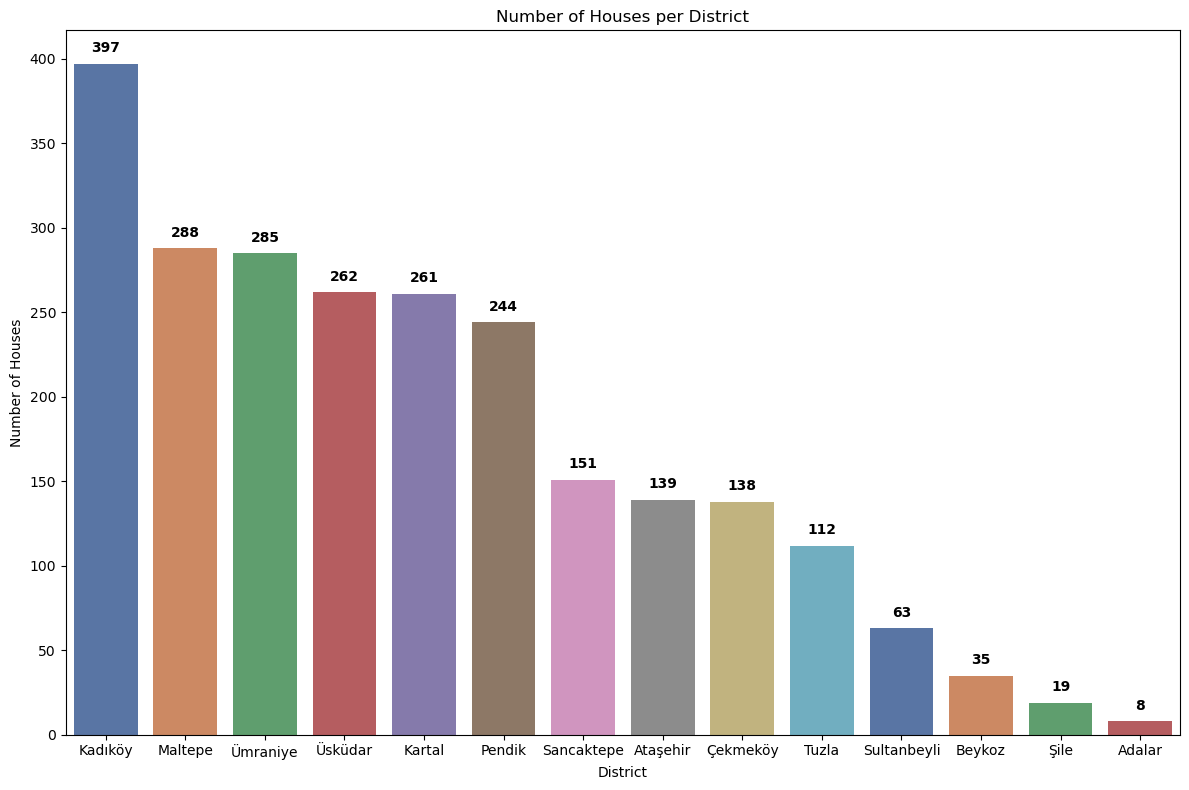

In [28]:
# Counting the number of houses per district and visualizing the data using a bar plot.
house_per_district = df_edited["District"].value_counts().reset_index()
house_per_district.rename(columns= {"count":"Number of Houses"}, inplace=True)
plt.figure(figsize=(12,8))
ax = sns.barplot(data=house_per_district, x="District", y="Number of Houses", palette="deep")
add_labels(ax)
plt.title("Number of Houses per District")
plt.xlabel("District")
plt.ylabel("Number of Houses")
plt.tight_layout()
plt.show()

C:\Users\Furkan\AppData\Local\Temp\ipykernel_12328\1610715135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=district_avg_house_price, x="District", y="Price (try)", palette="muted")


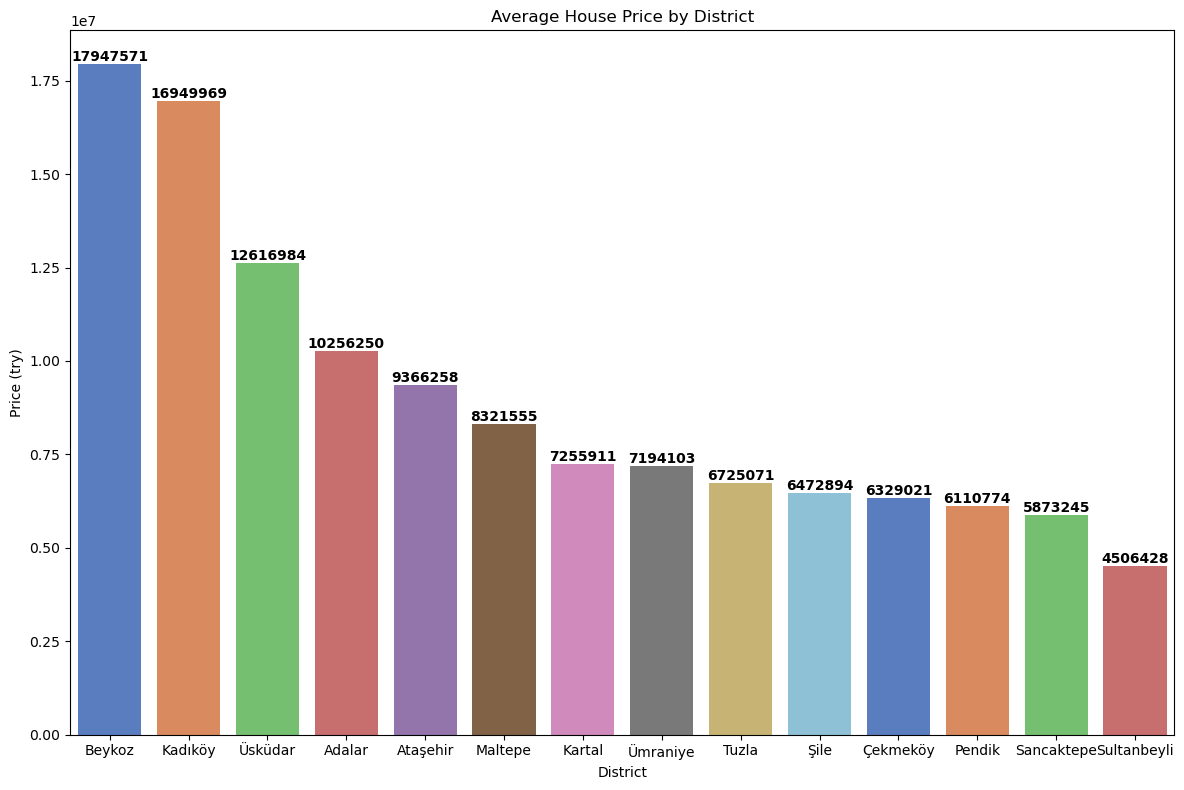

In [29]:
# Calculating the average house price by district and visualizing the data using a bar plot.
district_avg_house_price = df_edited.groupby("District")["Price (try)"].mean().reset_index().sort_values("Price (try)", ascending=False)
plt.figure(figsize=(12,8))
ax = sns.barplot(data=district_avg_house_price, x="District", y="Price (try)", palette="muted")
add_labels(ax)
plt.title("Average House Price by District")
plt.xlabel("District")
plt.ylabel("Price (try)")
plt.tight_layout()
plt.show()

In [30]:
# Calculating the average net area (m2) by room type.
avg_area_by_rooms = df_edited.groupby("Room")["Net Area (m2)"].mean().round(2).reset_index()
avg_area_by_rooms = avg_area_by_rooms.sort_values("Room")
avg_area_by_rooms

C:\Users\Furkan\AppData\Local\Temp\ipykernel_12328\3739010911.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_area_by_rooms = df_edited.groupby("Room")["Net Area (m2)"].mean().round(2).reset_index()


,Room,Net Area (m2)
0,1+0,33.56
1,1+1,50.39
2,1.5+1,85.00
3,2+1,77.33
4,2.5+1,98.71
5,3+1,109.96
6,3.5+1,135.63
7,3+2,144.52
8,4+1,156.72
9,4.5+1,159.14


In [31]:
# Counting the neighborhoods with more than 5 houses, filtering them, 
# and then calculating the average price by neighborhood to find the top 10 most expensive ones.
neighborhood_counts = df_edited["Neighborhood"].value_counts()
neighborhood_counts
filtered_neigborhoods = neighborhood_counts[neighborhood_counts > 5].index
neighborhoods = df_edited[df_edited["Neighborhood"].isin(filtered_neigborhoods)]

most_expensive_neighborhoods = neighborhoods.groupby(["District", "Neighborhood"])["Price (try)"].mean()\
.reset_index().sort_values("Price (try)", ascending=False)
top10_most_expensive_neighborhoods = most_expensive_neighborhoods.head(10)
top10_most_expensive_neighborhoods

,District,Neighborhood,Price (try)
14,Kadıköy,Caddebostan,3.159853e+07
19,Kadıköy,Fenerbahçe,2.823750e+07
8,Beykoz,Acarlar,2.497071e+07
160,Üsküdar,Sultantepe,2.458125e+07
146,Üsküdar,Altunizade,2.186429e+07
30,Kadıköy,Suadiye,2.016331e+07
22,Kadıköy,Göztepe,1.960732e+07
162,Üsküdar,Çengelköy,1.816429e+07
145,Üsküdar,Acıbadem,1.783750e+07
17,Kadıköy,Erenköy,1.768158e+07


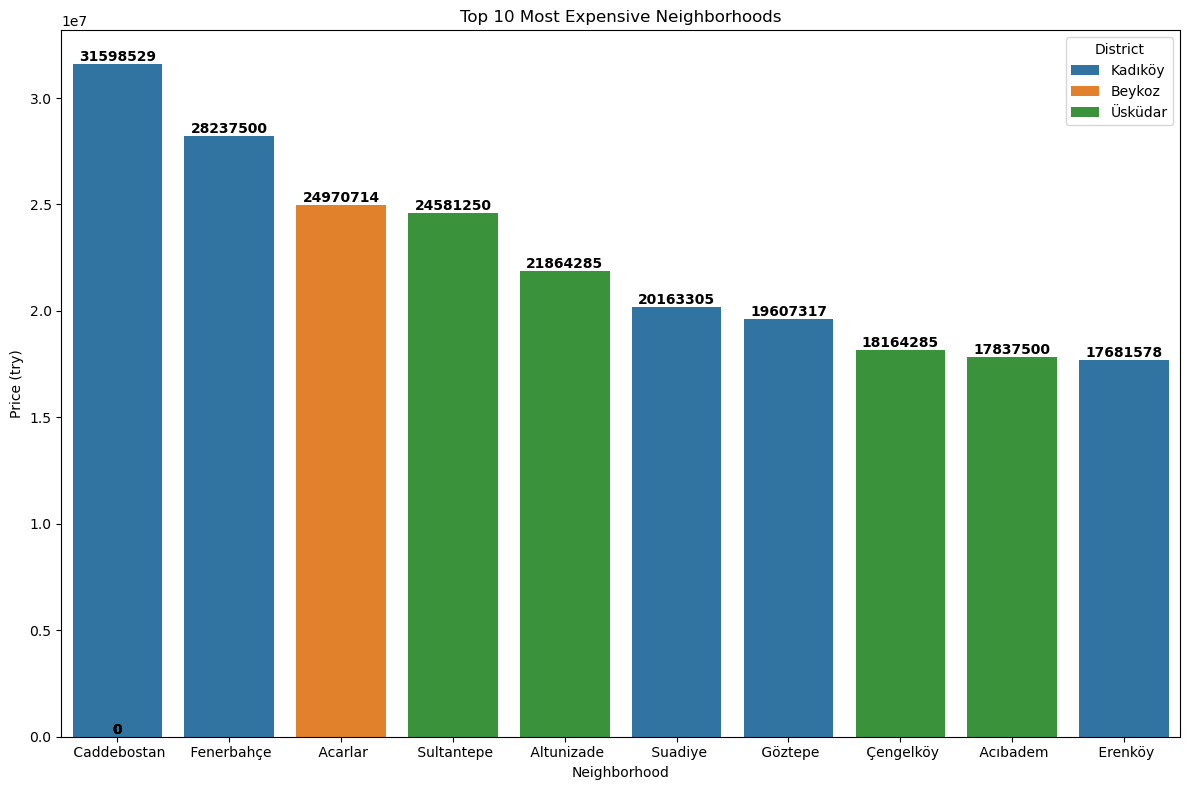

In [32]:
# Visualizing the top 10 most expensive neighborhoods using a bar plot
plt.figure(figsize=(12,8))
ax = sns.barplot(top10_most_expensive_neighborhoods, x="Neighborhood", y="Price (try)", hue="District")
add_labels(ax)
plt.title("Top 10 Most Expensive Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Price (try)")
plt.tight_layout()
plt.show()

In [40]:
# Calculating the average house price by building age.
house_age_vs_price = df_edited.groupby("Building Age")["Price (try)"].mean().reset_index()
house_age_vs_price

C:\Users\Furkan\AppData\Local\Temp\ipykernel_12328\96425303.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  house_age_vs_price = df_edited.groupby("Building Age")["Price (try)"].mean().reset_index()


,Building Age,Price (try)
0,0,1.238897e+07
1,1,1.063131e+07
2,2,9.845102e+06
3,3,1.010676e+07
4,4,1.094549e+07
5,5,1.070735e+07
6,6,1.183263e+07
7,7,1.118494e+07
8,8,9.852753e+06
9,9,9.505349e+06


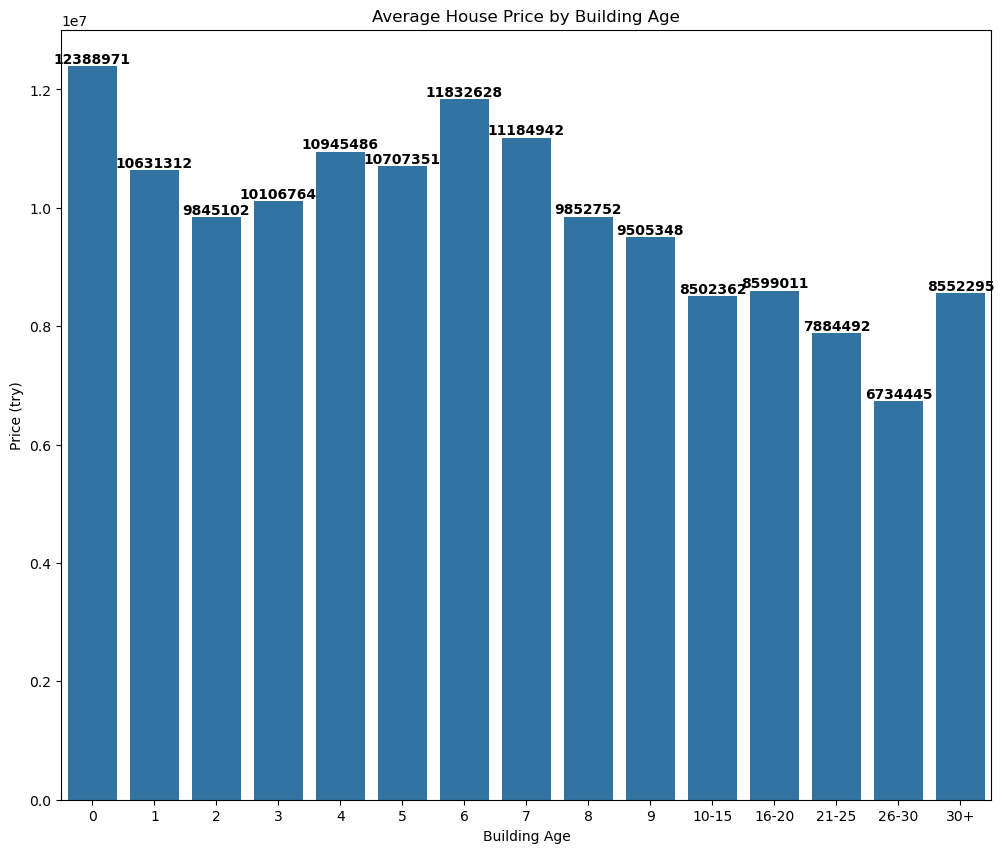

In [43]:
# Visualizing the average house price by building age using a bar plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(house_age_vs_price, x="Building Age", y="Price (try)")
add_labels(ax)
plt.title("Average House Price by Building Age")
plt.xlabel("Building Age")
plt.ylabel("Price (try)")
plt.show()

In [44]:
# Calculating the average house price by room number.
room_number_vs_price = df_edited.groupby("Room")["Price (try)"].mean().reset_index()
room_number_vs_price

C:\Users\Furkan\AppData\Local\Temp\ipykernel_12328\2084183194.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_number_vs_price = df_edited.groupby("Room")["Price (try)"].mean().reset_index()


,Room,Price (try)
0,1+0,3.870556e+06
1,1+1,5.646369e+06
2,1.5+1,1.575000e+07
3,2+1,6.145226e+06
4,2.5+1,9.200000e+06
5,3+1,9.619818e+06
6,3.5+1,1.538889e+07
7,3+2,9.859327e+06
8,4+1,1.890173e+07
9,4.5+1,2.819143e+07


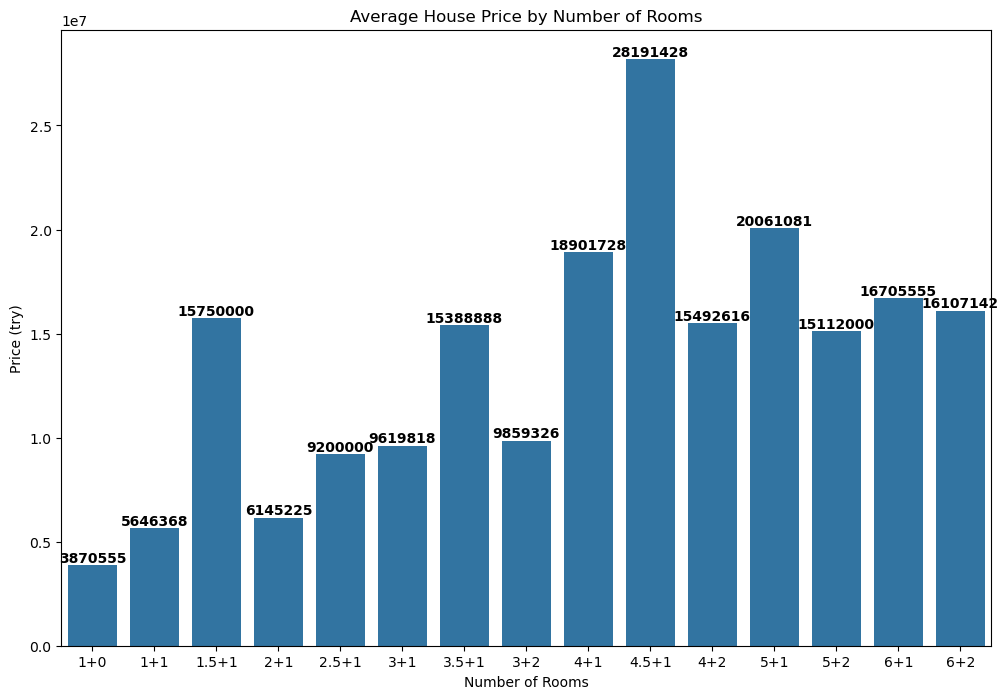

In [46]:
# Visualizing the average house price by number of rooms using a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(room_number_vs_price, x="Room", y="Price (try)")
add_labels(ax)
plt.title("Average House Price by Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Price (try)")
plt.show()

In [47]:
# Counting the heating types and filtering those that appear more than 10 times, 
# while summing the occurrences of less frequent heating types.
heating_counts = df_edited["Heating"].value_counts()
selected_heatings = heating_counts[heating_counts > 10]
other_count = heating_counts[heating_counts <= 10].sum()
final_counts = selected_heatings.copy()

# Adding an "Other" category if there are less frequent heating types, and calculating the percentage distribution of each heating type.
if other_count > 0:
    final_counts["Other"] = other_count
total_count = heating_counts.sum()
percentages = (final_counts / total_count) * 100

# Defining a function to format the percentage labels in the pie chart, showing the count only if the percentage is greater than 5%.
def autopct_format(pct):
    absolute = int(round(pct * total_count / 100.0))
    return f"{pct:.1f}%\n({absolute})" if pct > 5 else ""

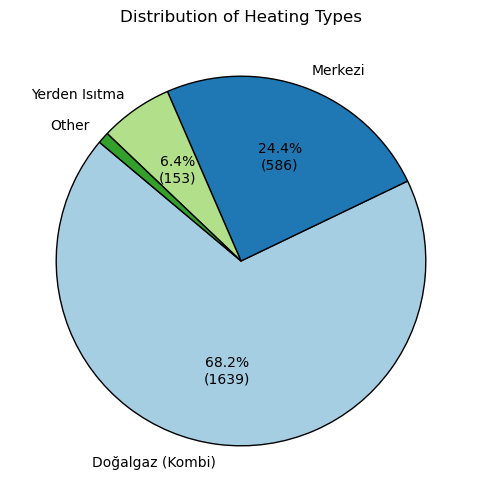

In [50]:
# Creating a pie chart to visualize the distribution of heating types
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired.colors[:len(final_counts)]
plt.pie(final_counts, labels=final_counts.index, 
        autopct=autopct_format, wedgeprops={"edgecolor": "black"}, 
        colors=colors, startangle=140)
plt.title("Distribution of Heating Types")
plt.show()

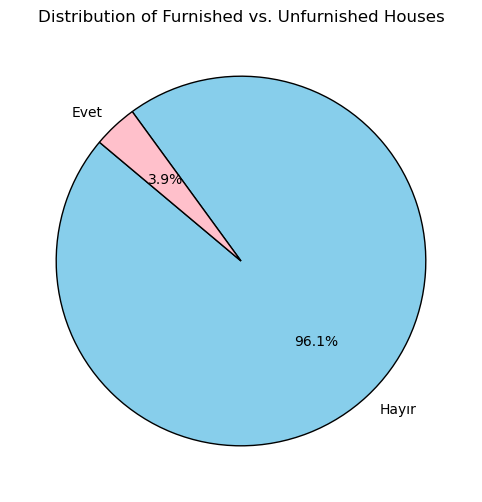

In [51]:
# Creating a pie chart to visualize the distribution of furnished vs. unfurnished houses
furnished_counts = df_edited["Furnished"].value_counts()
plt.figure(figsize=(10,6))
plt.pie(furnished_counts, labels=furnished_counts.index, autopct="%1.1f%%",
        wedgeprops={"edgecolor": "black"}, colors=["skyblue", "pink"], startangle=140)
plt.title("Distribution of Furnished vs. Unfurnished Houses")
plt.show()